In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
%matplotlib inline

In [2]:
df = pd.read_csv('tax_bills_june15_bbls.csv')

In [3]:
df.describe()

C:\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,bbl,emv,tbea,bav,tba,propertytax,condonumber
count,1.081624e+06,1.073473e+06,1.074509e+06,1.074509e+06,1.040176e+06,1.074509e+06,237110.000000
mean,3.255302e+09,1.072281e+06,3.210457e+04,2.681073e+05,2.136745e+04,2.012084e+04,973.276226
std,1.214484e+09,2.007340e+07,8.811361e+05,8.215277e+06,2.952722e+05,2.881755e+05,882.552609
min,1.000010e+09,1.000000e+01,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000
25%,3.005150e+09,NaN,NaN,NaN,NaN,NaN,NaN
50%,3.077450e+09,NaN,NaN,NaN,NaN,NaN,NaN
75%,4.090630e+09,NaN,NaN,NaN,NaN,NaN,NaN
max,5.080500e+09,1.457087e+10,6.281640e+08,5.879484e+09,6.733982e+07,6.733982e+07,9566.000000


In [5]:
cols = list(df.loc[:, 'bbl':'bav'])

In [6]:
df[cols].isnull().values.any()

True

In [7]:
# We dont need address and ownername as it does not provide any valuable data
del df['address']

In [8]:
del df['ownername']

In [10]:
df.head()

,bbl,taxclass,taxrate,emv,tbea,bav,tba,propertytax,condonumber,condo
0,1000010010,4 - commercial property,10.6840%,337672000.0,15749050.0,147407802.0,NaN,0.0,NaN,NaN
1,1000010101,4 - commercial property,10.6840%,25607000.0,1106496.0,10356570.0,NaN,0.0,NaN,NaN
2,1000010201,4 - commercial property,10.6840%,233982000.0,10366655.0,97029720.0,NaN,0.0,NaN,NaN
3,1000020001,4 - commercial property,10.6840%,69458000.0,3163690.0,29611473.0,NaN,0.0,NaN,NaN
4,1000020002,4 - commercial property,10.6840%,55592000.0,2672762.0,25016491.0,654246.0,654246.0,NaN,NaN


In [11]:
df['taxclass'].unique()

array(['4 - commercial property', nan,
       '2a - 4-6 unit residential building',
       ' 2 - residential, more than 10 units',
       ' 2c - co-op or condo, less than 11 units',
       '2b - 7-10 unit residential building',
       ' 1 - small home, less than 4 families', '3 - utility property',
       '1c - condo in 1-3 unit building',
       '1a - condo unit in 1-3 story building',
       ' 1b - vacant land, zoned residential', '1d - bungalow colony'], dtype=object)

In [12]:
#Breaking BBL into individual columns for Borough(first digit), block(next 5 digits) and lot(next 4 digits)
df['bbl'] = df['bbl'].apply(lambda f: str(f))

In [13]:
df['borough'] = df['bbl'].apply(lambda f: int(f[0]))

In [14]:
df['block'] = df['bbl'].apply(lambda f: int(f[1:6]))

In [15]:
df['lot'] = df['bbl'].apply(lambda f: int(f[-4:]))

In [16]:
del df['bbl']

In [17]:
df.dtypes

taxclass        object
taxrate         object
emv            float64
tbea           float64
bav            float64
tba            float64
propertytax    float64
condonumber    float64
condo           object
borough          int64
block            int64
lot              int64
dtype: object

In [18]:
df['taxrate'].unique()

array(['10.6840%', nan, '12.8550%', '19.1570%', '11.1250%'], dtype=object)

In [19]:
df[df['taxrate'].isnull() == True]['condo'].unique()

array(['lot', nan, 'unit'], dtype=object)

In [20]:
#the entries with no tax and no condo number are public places
#aside from the public places, the entries which have no property tax but not null condo numbers are vacant lots
#Separating the public places
df[(df['taxrate'].isnull() == True) & (df['condo'].isnull() == True)].head()

,taxclass,taxrate,emv,tbea,bav,tba,propertytax,condonumber,condo,borough,block,lot
91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,8,44
1672,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,407,13
1712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,407,14
1941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,407,16
6862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,63,13


In [21]:
df[(df['taxrate'].isnull() == True) & (df['condo'].isnull() == True)].describe()

C:\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,emv,tbea,bav,tba,propertytax,condonumber,borough,block,lot
count,0.0,1.027000e+03,1.027000e+03,1.027000e+03,1.027000e+03,0.0,2015.000000,2015.000000,2015.000000
mean,NaN,1.725528e+05,1.725528e+05,1.725528e+05,1.618750e+05,NaN,2.494293,3207.454591,71.389578
std,NaN,3.831254e+05,3.831254e+05,3.831254e+05,3.209656e+05,NaN,1.098361,2987.212608,495.528682
min,NaN,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,NaN,1.000000,1.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,1440.500000,9.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,2408.000000,27.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,3638.000000,52.000000
max,NaN,7.330609e+06,7.330609e+06,7.330609e+06,5.375914e+06,NaN,5.000000,16234.000000,9080.000000


In [22]:
df['borough'] = df['borough'].map({1:'Manhattan/new york', 2:'bronx/bronx', 3:'Brooklyn/kings', 4:'queens/queens', 5:'staten/richmond'})

In [23]:
df['borough'].unique()

array(['Manhattan/new york', 'bronx/bronx', 'Brooklyn/kings',
       'queens/queens', 'staten/richmond'], dtype=object)

In [24]:
df_vacant = df[(df['taxrate'].isnull() == True) & (df['condo'].isnull() == True)]

In [25]:
df_public = df_vacant[df_vacant['propertytax'].isnull() == True]

In [26]:
df_vacant.head()

,taxclass,taxrate,emv,tbea,bav,tba,propertytax,condonumber,condo,borough,block,lot
91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Manhattan/new york,8,44
1672,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Manhattan/new york,407,13
1712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Manhattan/new york,407,14
1941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Manhattan/new york,407,16
6862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Manhattan/new york,63,13


In [28]:
df[(df['taxclass'].isnull() == False) & (df['condonumber'].isnull() == True)]['taxclass'].unique()

array(['4 - commercial property', '2a - 4-6 unit residential building',
       '2b - 7-10 unit residential building',
       ' 2 - residential, more than 10 units',
       ' 1 - small home, less than 4 families',
       ' 2c - co-op or condo, less than 11 units', '3 - utility property',
       '1c - condo in 1-3 unit building',
       ' 1b - vacant land, zoned residential', '1d - bungalow colony'], dtype=object)

In [29]:
df['taxclass'].unique()

array(['4 - commercial property', nan,
       '2a - 4-6 unit residential building',
       ' 2 - residential, more than 10 units',
       ' 2c - co-op or condo, less than 11 units',
       '2b - 7-10 unit residential building',
       ' 1 - small home, less than 4 families', '3 - utility property',
       '1c - condo in 1-3 unit building',
       '1a - condo unit in 1-3 story building',
       ' 1b - vacant land, zoned residential', '1d - bungalow colony'], dtype=object)

In [30]:
df[df['condo'].isnull() == False]['taxclass'].unique()

array(['4 - commercial property', nan,
       ' 2 - residential, more than 10 units',
       ' 2c - co-op or condo, less than 11 units',
       '1c - condo in 1-3 unit building',
       '1a - condo unit in 1-3 story building',
       ' 1 - small home, less than 4 families',
       ' 1b - vacant land, zoned residential',
       '2a - 4-6 unit residential building',
       '2b - 7-10 unit residential building'], dtype=object)

In [31]:
df[df['condo'] == 'lot']['taxclass'].unique()

array([nan], dtype=object)

In [32]:
df[df['condo'] == 'unit']['taxclass'].unique()

array(['4 - commercial property', ' 2 - residential, more than 10 units',
       ' 2c - co-op or condo, less than 11 units', nan,
       '1c - condo in 1-3 unit building',
       '1a - condo unit in 1-3 story building',
       ' 1 - small home, less than 4 families',
       ' 1b - vacant land, zoned residential',
       '2a - 4-6 unit residential building',
       '2b - 7-10 unit residential building'], dtype=object)

In [33]:
df[df['condo'] == 'lot']['propertytax'].unique()

array([ nan])

In [34]:
df_public.describe()

C:\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,emv,tbea,bav,tba,propertytax,condonumber,block,lot
count,0.0,0.0,0.0,0.0,0.0,0.0,988.000000,988.000000
mean,NaN,NaN,NaN,NaN,NaN,NaN,3566.742915,63.211538
std,NaN,NaN,NaN,NaN,NaN,NaN,3444.556997,410.149713
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,1133.500000,13.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,2390.000000,29.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,5098.750000,53.000000
max,NaN,NaN,NaN,NaN,NaN,NaN,16234.000000,9060.000000


In [36]:
vacant_group_borough = df_vacant.groupby(df_vacant['borough'])

In [37]:
vacant_group_borough

In [38]:
vacant_group_borough.describe()

C:\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


emv          tbea           bav           tba  \
borough                                                                   
Brooklyn/kings     count  0.0  3.070000e+02  3.070000e+02  3.070000e+02   
                   mean   NaN  1.411018e+05  1.411018e+05  1.411018e+05   
                   std    NaN  2.184138e+05  2.184138e+05  2.184138e+05   
                   min    NaN  1.040000e+02  1.040000e+02  1.040000e+02   
                   25%    NaN           NaN           NaN           NaN   
                   50%    NaN           NaN           NaN           NaN   
                   75%    NaN           NaN           NaN           NaN   
                   max    NaN  1.470414e+06  1.470414e+06  1.470414e+06   
Manhattan/new york count  0.0  2.890000e+02  2.890000e+02  2.890000e+02   
                   mean   NaN  2.239582e+05  2.239582e+05  2.239582e+05   
                   std    NaN  4.128390e+05  4.128390e+05  4.128390e+05   
                   min    NaN  2.780000e+03  2.780000e+03  2.780000e+03   
                   25%    NaN           NaN           NaN           NaN   
                   50%    NaN           NaN           NaN           NaN   
                   75%    NaN           NaN           NaN           NaN   
                   max    NaN  5.375914e+06  5.375914e+06  5.375914e+06   
bronx/bronx        count  0.0  3.530000e+02  3.530000e+02  3.530000e+02   
                   mean   NaN  1.372666e+05  1.372666e+05  1.372666e+05   
                   std    NaN  4.437434e+05  4.437434e+05  4.437434e+05   
                   min    NaN  6.900000e+01  6.900000e+01  6.900000e+01   
                   25%    NaN           NaN           NaN           NaN   
                   50%    NaN           NaN           NaN           NaN   
                   75%    NaN           NaN           NaN           NaN   
                   max    NaN  7.330609e+06  7.330609e+06  7.330609e+06   
queens/queens      count  0.0  5.900000e+01  5.900000e+01  5.900000e+01   
                   mean   NaN  3.139800e+05  3.139800e+05  3.139800e+05   
                   std    NaN  5.005117e+05  5.005117e+05  5.005117e+05   
                   min    NaN  8.000000e+00  8.000000e+00  8.000000e+00   
                   25%    NaN           NaN           NaN           NaN   
                   50%    NaN           NaN           NaN           NaN   
                   75%    NaN           NaN           NaN           NaN   
                   max    NaN  3.692637e+06  3.692637e+06  3.692637e+06   
staten/richmond    count  0.0  1.900000e+01  1.900000e+01  1.900000e+01   
                   mean   NaN  1.152449e+05  1.152449e+05  1.152449e+05   
                   std    NaN  1.349054e+05  1.349054e+05  1.349054e+05   
                   min    NaN  8.662000e+03  8.662000e+03  8.662000e+03   
                   25%    NaN           NaN           NaN           NaN   
                   50%    NaN           NaN           NaN           NaN   
                   75%    NaN           NaN           NaN           NaN   
                   max    NaN  5.768810e+05  5.768810e+05  5.768810e+05   

                           propertytax  condonumber         block          lot  
borough                                                                         
Brooklyn/kings     count  3.070000e+02          0.0    702.000000   702.000000  
                   mean   1.351949e+05          NaN   3388.991453    49.292023  
                   std    2.041845e+05          NaN   2285.888012   341.865256  
                   min    1.040000e+02          NaN      3.000000     1.000000  
                   25%             NaN          NaN   1637.000000     8.000000  
                   50%             NaN          NaN   2965.000000    25.000000  
                   75%             NaN          NaN   5421.000000    49.750000  
                   max    1.387192e+06          NaN   8955.000000  9001.000000  
Manhattan/new york count  2.890000e+02          0.0    485.000000

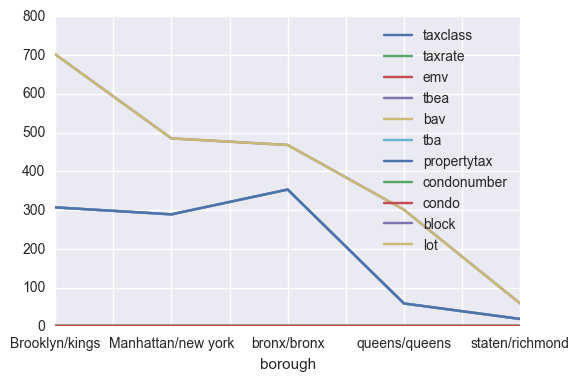

In [39]:
vacant_group_borough.count().plot(kind = 'line')

In [40]:
#lets see which area has maximum public places
public_group_borough = df_public.groupby(df_public['borough'])

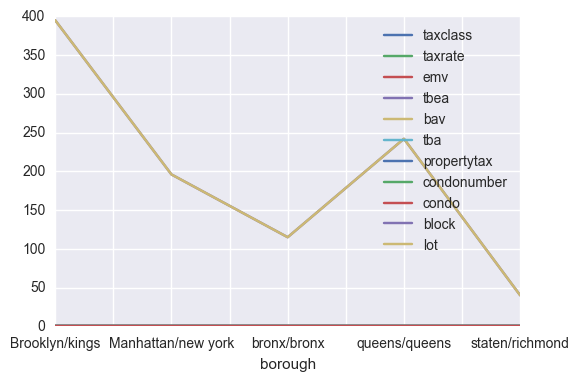

In [41]:
public_group_borough.count().plot(kind = 'line')

In [42]:
df[(df['tbea'].isnull() == False) & (df['propertytax'].isnull() == True)]

,taxclass,taxrate,emv,tbea,bav,tba,propertytax,condonumber,condo,borough,block,lot


In [44]:
#the condos with no taxes are federally owned buildings(police offices etc.)
df_govt = df[(df['propertytax'].isnull() == True) & (df['condo'].isnull() == False)]

In [45]:
govt_group_borough = df_govt.groupby(df['borough'])

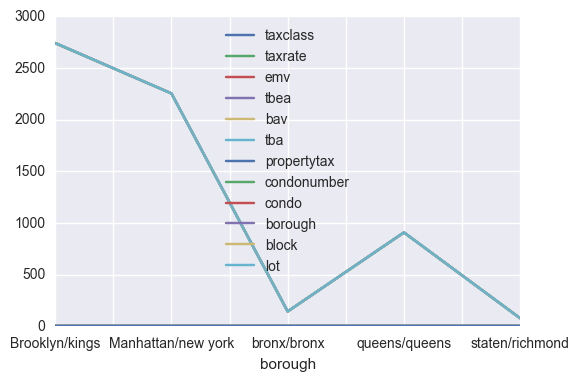

In [46]:
govt_group_borough.count().plot(kind = 'line')

In [47]:
df[(df['taxclass'].isnull() == True) & (df['propertytax'].isnull() == False) &(df['condo'].isnull() == False)]

,taxclass,taxrate,emv,tbea,bav,tba,propertytax,condonumber,condo,borough,block,lot
68584,NaN,NaN,NaN,143677.0,143677.0,143677.0,143677.0,2284.0,unit,Manhattan/new york,1073,1101
68585,NaN,NaN,NaN,30067.0,30067.0,30067.0,30067.0,2284.0,unit,Manhattan/new york,1073,1102
68587,NaN,NaN,NaN,81922.0,81922.0,81922.0,81922.0,2285.0,unit,Manhattan/new york,1073,1201
68588,NaN,NaN,NaN,21777.0,21777.0,21777.0,21777.0,2285.0,unit,Manhattan/new york,1073,1202
132864,NaN,NaN,NaN,446608.0,446608.0,446608.0,446608.0,2388.0,unit,Manhattan/new york,1832,1101
151207,NaN,NaN,NaN,2907.0,2907.0,2907.0,2907.0,1860.0,unit,Manhattan/new york,2226,1002
174087,NaN,NaN,NaN,33684.0,33684.0,33684.0,33684.0,71.0,unit,bronx/bronx,3206,1001
252235,NaN,NaN,NaN,65659.0,65659.0,65659.0,65659.0,NaN,unit,bronx/bronx,5851,2091
259555,NaN,NaN,NaN,423779.0,423779.0,423779.0,423779.0,3143.0,unit,Brooklyn/kings,236,1101


In [48]:
df.describe()

C:\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,emv,tbea,bav,tba,propertytax,condonumber,block,lot
count,1.073473e+06,1.074509e+06,1.074509e+06,1.040176e+06,1.074509e+06,237110.000000,1.081624e+06,1.081624e+06
mean,1.072281e+06,3.210457e+04,2.681073e+05,2.136745e+04,2.012084e+04,973.276226,4.718907e+03,3.857791e+02
std,2.007340e+07,8.811361e+05,8.215277e+06,2.952722e+05,2.881755e+05,882.552609,3.674913e+03,8.416516e+02
min,1.000000e+01,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000,1.000000e+00,1.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,1.537000e+03,2.400000e+01
50%,NaN,NaN,NaN,NaN,NaN,NaN,3.990000e+03,5.100000e+01
75%,NaN,NaN,NaN,NaN,NaN,NaN,6.863000e+03,1.910000e+02
max,1.457087e+10,6.281640e+08,5.879484e+09,6.733982e+07,6.733982e+07,9566.000000,1.635000e+04,9.978000e+03


In [49]:
#lets see which area earns what property tax in comparison with the public places it maintains
overall_group_borough = df.groupby(df['borough'])

In [51]:
overall_group_borough_sum = overall_group_borough.sum()

In [52]:
overall_group_borough_sum

,emv,tbea,bav,tba,propertytax,condonumber,block,lot
borough,,,,,,,,
Brooklyn/kings,2.612859e+11,5.314923e+09,4.221246e+10,2.932472e+09,2.857547e+09,94598340.0,1510575885,99491884
Manhattan/new york,4.660706e+11,1.926718e+10,1.669362e+11,1.408879e+10,1.368449e+10,119664508.0,166908287,168053234
bronx/bronx,7.437387e+10,2.360405e+09,1.937125e+10,1.134023e+09,1.092339e+09,542067.0,421345453,54241726
queens/queens,2.794642e+11,6.328878e+09,5.053329e+10,3.356345e+09,3.276217e+09,15210511.0,2550496729,70196331
staten/richmond,6.987047e+10,1.225262e+09,9.030484e+09,7.142750e+08,7.094367e+08,758100.0,454757136,25284756


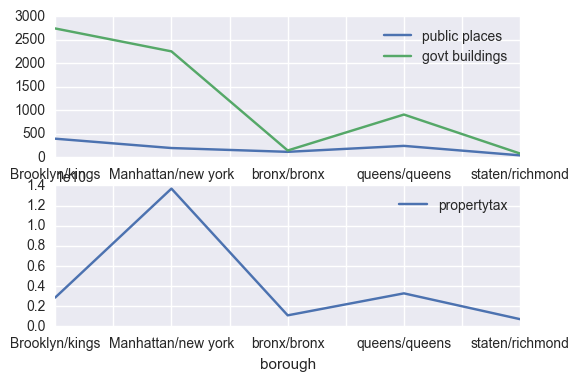

In [53]:
#lets see which area comparatively generates what property tax and maintains how many public, govermnent spaces
plt.figure(1)
plt.subplot(211)
public_group_borough['lot'].count().plot.line( label = 'public places')
govt_group_borough['lot'].count().plot( label = 'govt buildings')
plt.legend()

plt.subplot(212)
overall_group_borough_sum['propertytax'].plot(kind = 'line')
plt.legend()
plt.show()

In [54]:
#Do the above graphs do a good job of depicting the real scenario? I feel we need to find the number of public and government
#divided by total number of taxable lots in the area
#Also, I feel we need to find the average property tax per lot in that area, for a better understanding
taxable_lots_total = df[df['propertytax'].isnull() == False]['lot'].count()

In [55]:
taxable_lots_borough = df['lot'].groupby(df['borough'])

In [56]:
df_types = pd.concat([public_group_borough['lot'].count(), govt_group_borough['lot'].count(), taxable_lots_borough.count()], axis = 1)
df_types.columns = ['public', 'government', 'taxable']

In [57]:
df_types

,public,government,taxable
borough,,,
Brooklyn/kings,395,2742,330704
Manhattan/new york,196,2254,151532
bronx/bronx,115,144,102676
queens/queens,242,909,362585
staten/richmond,40,78,134127


In [58]:
df_types['public per taxable'] = (df_types['public']/df_types['taxable'])

In [59]:
df_types

,public,government,taxable,public per taxable
borough,,,,
Brooklyn/kings,395,2742,330704,0.001194
Manhattan/new york,196,2254,151532,0.001293
bronx/bronx,115,144,102676,0.001120
queens/queens,242,909,362585,0.000667
staten/richmond,40,78,134127,0.000298


In [60]:
df_types['govt per taxable'] = (df_types['government']/df_types['taxable'])

In [61]:
df_types

,public,government,taxable,public per taxable,govt per taxable
borough,,,,,
Brooklyn/kings,395,2742,330704,0.001194,0.008291
Manhattan/new york,196,2254,151532,0.001293,0.014875
bronx/bronx,115,144,102676,0.001120,0.001402
queens/queens,242,909,362585,0.000667,0.002507
staten/richmond,40,78,134127,0.000298,0.000582


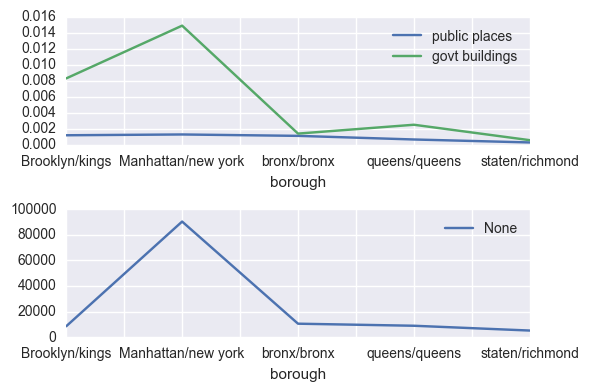

In [62]:
plt.figure(1)
plt.subplot(211)
df_types['public per taxable'].plot( label = 'public places')
df_types['govt per taxable'].plot( label = 'govt buildings')
plt.legend()

plt.subplot(212)
(overall_group_borough_sum['propertytax']/taxable_lots_borough.count()).plot(kind = 'line')
plt.legend()
plt.tight_layout()
plt.show()

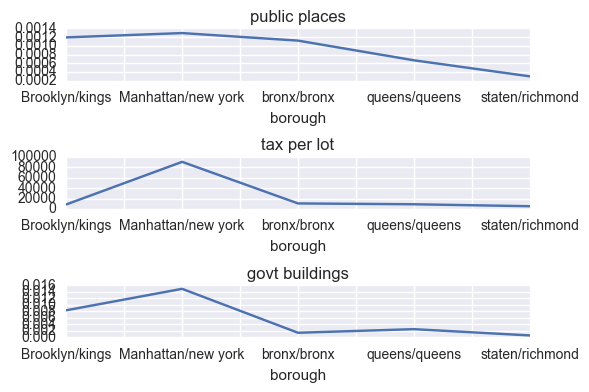

In [63]:
#lets Plot public places separately to get a better idea
plt.figure(1)
plt.subplot(311)
df_types['public per taxable'].plot( title = 'public places')

plt.subplot(312)
(overall_group_borough_sum['propertytax']/taxable_lots_borough.count()).plot(kind = 'line', title = 'tax per lot')

plt.subplot(313)
df_types['govt per taxable'].plot( title = 'govt buildings')

plt.tight_layout()
plt.show()

In [64]:
#Plotting the average for all 5 borough also with the graphs
tax_per_lot = (df['propertytax'].sum()/df[(df['propertytax'].isnull() == False)]['lot'].count())
public_per_lot = df_public['lot'].count()/df[(df['propertytax'].isnull() == False)]['lot'].count()
govt_per_lot = df_govt['lot'].count()/df[df['propertytax'].isnull() == False]['lot'].count()

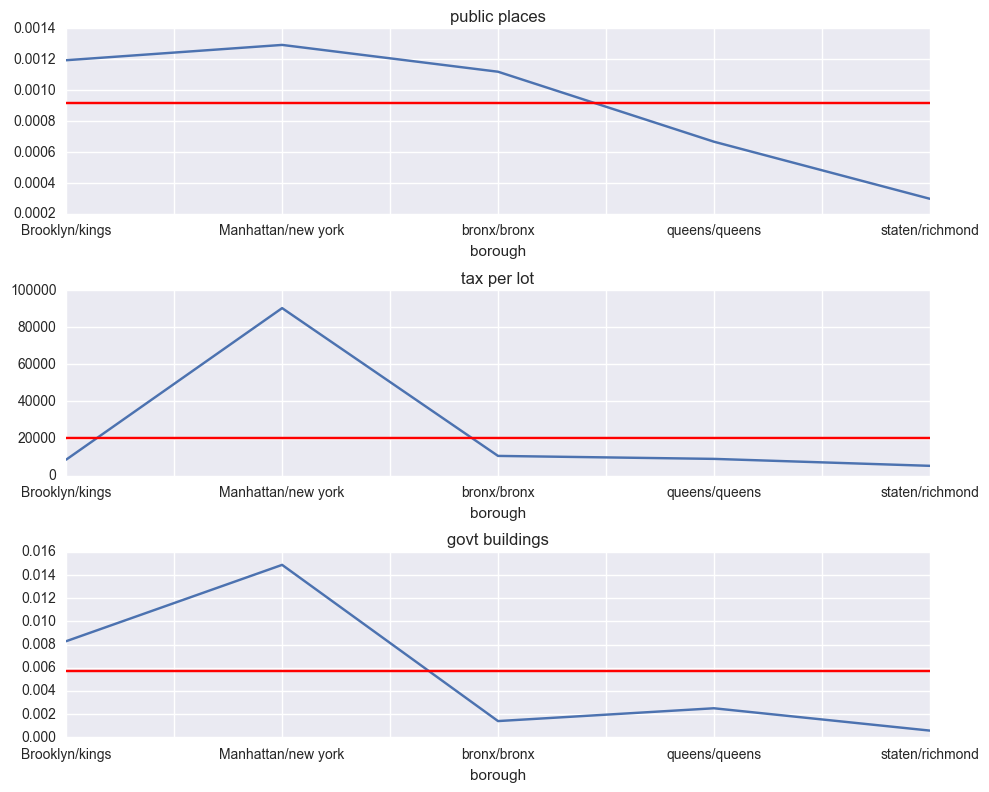

In [65]:
#plotting
plt.figure(figsize=(10, 8))
plt.subplot(311)
df_types['public per taxable'].plot( title = 'public places')
plt.axhline(y=public_per_lot, color='r', linestyle='-')

plt.subplot(312)
(overall_group_borough_sum['propertytax']/taxable_lots_borough.count()).plot(kind = 'line', title = 'tax per lot')
plt.axhline(y=tax_per_lot, color='r', linestyle='-')

plt.subplot(313)
df_types['govt per taxable'].plot( title = 'govt buildings')
plt.axhline(y=govt_per_lot, color='r', linestyle='-')


plt.tight_layout()
plt.show()

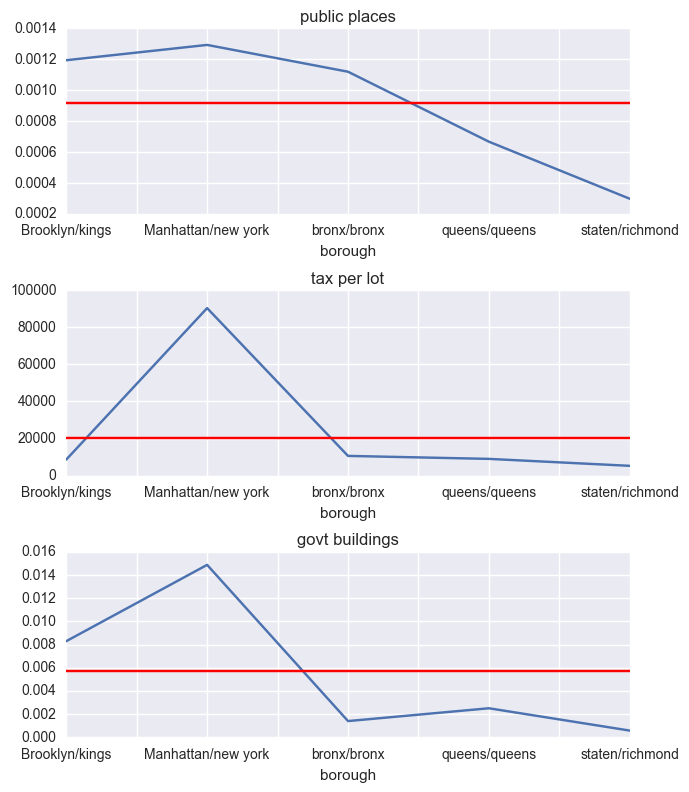

In [66]:
#Increasing size for better visualization
plt.figure(figsize=(7,8))
plt.subplot(311)
df_types['public per taxable'].plot( title = 'public places')
plt.axhline(y=public_per_lot, color='r', linestyle='-')

plt.subplot(312)
(overall_group_borough_sum['propertytax']/taxable_lots_borough.count()).plot(kind = 'line', title = 'tax per lot')
plt.axhline(y=tax_per_lot, color='r', linestyle='-')

plt.subplot(313)
df_types['govt per taxable'].plot( title = 'govt buildings')
plt.axhline(y=govt_per_lot, color='r', linestyle='-')


plt.tight_layout()
plt.show()

In [74]:
#We can see that bronx and brooklyn maintain more number of public places despite charging lesser property tax, a sign of
#effecient tax expenditure
df[(df['propertytax'].isnull() == False) & (df['taxclass'].isnull() == False)].shape[0]/df.shape[0]

0.992464109524197

In [75]:
df_vacant.shape

(2015, 12)

In [76]:
df['taxclass'].unique()

array(['4 - commercial property', nan,
       '2a - 4-6 unit residential building',
       ' 2 - residential, more than 10 units',
       ' 2c - co-op or condo, less than 11 units',
       '2b - 7-10 unit residential building',
       ' 1 - small home, less than 4 families', '3 - utility property',
       '1c - condo in 1-3 unit building',
       '1a - condo unit in 1-3 story building',
       ' 1b - vacant land, zoned residential', '1d - bungalow colony'], dtype=object)

In [77]:
df[df['taxclass'] == ' 1b - vacant land, zoned residential'].shape[0] + df_vacant.shape[0]

24019

In [78]:
(df[df['taxclass'] == ' 1b - vacant land, zoned residential'].shape[0] + df_vacant.shape[0])/df.shape[0]

0.022206422934402344

In [84]:
#from the above ratio, we can conclude that very low (~2%) of properties are vacant. Also, of the vacant, majority are zoned
#resedential(24019) against the non-zoned vacatnt(2015). Let's separate the resendtial and commercial properties.
df_resd = df[(df['taxclass'].isnull() == False) & (df['taxclass'] != '3 - utility property') & (df['taxclass'] != '4 - commercial property')]
df_comm = df[(df['taxclass'].isnull() == False) & ((df['taxclass'] == '3 - utility property') | (df['taxclass'] == '4 - commercial property'))]

In [85]:
df_comm.shape

(106727, 12)

In [86]:
df_resd.shape

(966746, 12)

In [87]:
df_resd.shape[0]/df_comm.shape[0]

9.058120250733179

In [88]:
df_resd.shape[0]/df.shape[0]

0.8937911880653536

In [89]:
df_comm.shape[0]/df.shape[0]

0.09867292145884336